<a href="https://colab.research.google.com/github/ashish620-boogle/cats-and-dogs-image-classification/blob/main/Cats_and_dogs_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats and Dogs Image classification model

## Getting our data ready

In [ ]:
!nvidia-smi

Thu Feb 17 14:12:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

get your kaggle.json file from your kaggle account

In [ ]:
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!whoami

root


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 265M/271M [00:02<00:00, 100MB/s] 
100% 271M/271M [00:02<00:00, 95.2MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 90.3MB/s]
 96% 524M/543M [00:03<00:00, 198MB/s]
100% 543M/543M [00:03<00:00, 167MB/s]


In [ ]:
import zipfile

def unzip_file(filename):
  zip_ref = zipfile.ZipFile(filename)
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_file("train.zip")


In [ ]:
unzip_file("test1.zip")

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-02-17 14:12:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-17 14:12:40 (62.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import *

In [ ]:
walk_through_dir("test1")

There are 0 directories and 12500 images in 'test1'.


In [ ]:
import os
for images in os.walk("train"):
   print(f"{images}")
   break

('train', [], ['cat.9011.jpg', 'cat.6190.jpg', 'cat.4208.jpg', 'dog.12323.jpg', 'dog.729.jpg', 'dog.6695.jpg', 'dog.2856.jpg', 'dog.9566.jpg', 'dog.12340.jpg', 'dog.11127.jpg', 'dog.7256.jpg', 'dog.1989.jpg', 'cat.2254.jpg', 'cat.12104.jpg', 'dog.8779.jpg', 'dog.10143.jpg', 'dog.2960.jpg', 'cat.1210.jpg', 'dog.8275.jpg', 'cat.11046.jpg', 'dog.10621.jpg', 'dog.12247.jpg', 'dog.4713.jpg', 'dog.8344.jpg', 'cat.4277.jpg', 'dog.12262.jpg', 'dog.9002.jpg', 'dog.8018.jpg', 'cat.3127.jpg', 'cat.473.jpg', 'dog.329.jpg', 'dog.5080.jpg', 'cat.5987.jpg', 'dog.11967.jpg', 'cat.6825.jpg', 'dog.3725.jpg', 'cat.1683.jpg', 'cat.7390.jpg', 'dog.4797.jpg', 'dog.2625.jpg', 'dog.1359.jpg', 'dog.8871.jpg', 'cat.11220.jpg', 'cat.8599.jpg', 'dog.10480.jpg', 'cat.9128.jpg', 'dog.3106.jpg', 'dog.846.jpg', 'cat.3528.jpg', 'cat.6747.jpg', 'dog.3005.jpg', 'dog.3885.jpg', 'cat.7819.jpg', 'cat.131.jpg', 'dog.7538.jpg', 'cat.8765.jpg', 'dog.5870.jpg', 'cat.11432.jpg', 'dog.5425.jpg', 'dog.6685.jpg', 'dog.5846.jpg', '

In [ ]:
path = 'train'
cats = []
dogs = []
for i in os.listdir(path):
    if os.path.isfile(os.path.join(path,i)) and 'cat' in i:
        cats.append(i)
    if os.path.isfile(os.path.join(path,i)) and 'dog' in i:
        dogs.append(i)

In [ ]:
cats[:2], dogs[:2]

(['cat.9011.jpg', 'cat.6190.jpg'], ['dog.12323.jpg', 'dog.729.jpg'])

In [ ]:
len(cats), len(dogs)

(12500, 12500)

In [ ]:
len(os.listdir(path))

25000

In [ ]:
12500 + 12500 


25000

In [ ]:
!mkdir train/cats

In [ ]:
!mkdir train/dogs

In [ ]:
import glob
import shutil
import os

src_dir = "train"
dst_dir = "train/cats"
for imgs in cats:
  for jpgfile in glob.iglob(os.path.join(src_dir, imgs)):
    shutil.copy(jpgfile, dst_dir)

In [ ]:
src_dir = "train"
dst_dir = "train/dogs"
for imgs in dogs:
  for jpgfile in glob.iglob(os.path.join(src_dir, imgs)):
    shutil.copy(jpgfile, dst_dir)

In [ ]:
walk_through_dir("train")

There are 2 directories and 25000 images in 'train'.
There are 0 directories and 12500 images in 'train/dogs'.
There are 0 directories and 12500 images in 'train/cats'.


In [ ]:
for imgs in cats:
  for file in glob.iglob(os.path.join(src_dir, imgs)):
    os.remove(file)
for imgs in dogs:
  for file in glob.iglob(os.path.join(src_dir, imgs)):
    os.remove(file) 

In [ ]:
walk_through_dir(src_dir)

There are 2 directories and 0 images in 'train'.
There are 0 directories and 12500 images in 'train/dogs'.
There are 0 directories and 12500 images in 'train/cats'.


In [ ]:
walk_through_dir("/content/test1")

There are 0 directories and 12500 images in '/content/test1'.


In [ ]:
2+3

5

In [ ]:
!mkdir test

In [ ]:
!mkdir test/cats

In [ ]:
!mkdir test/dogs

In [ ]:
src_dir = "train/cats"
dst_dir = "test/cats"
cat_img_count = len(cats) * 0.2
dog_img_count = len(dogs) * 0.2
for imgs in cats:
  if(cat_img_count):
    for jpgfile in glob.iglob(os.path.join(src_dir, imgs)):
      shutil.copy(jpgfile, dst_dir)
      os.remove(jpgfile)
      cat_img_count = cat_img_count - 1
  else:
    break
src_dir = "train/dogs"
dst_dir = "test/dogs"
for imgs in dogs:
  if(dog_img_count):
    for jpgfile in glob.iglob(os.path.join(src_dir, imgs)):
      shutil.copy(jpgfile, dst_dir)
      os.remove(jpgfile)
      dog_img_count = dog_img_count - 1
  else:
    break

In [ ]:
walk_through_dir("/content/train")
walk_through_dir("/content/test")

There are 2 directories and 0 images in '/content/train'.
There are 0 directories and 10000 images in '/content/train/dogs'.
There are 0 directories and 10000 images in '/content/train/cats'.
There are 2 directories and 0 images in '/content/test'.
There are 0 directories and 2500 images in '/content/test/dogs'.
There are 0 directories and 2500 images in '/content/test/cats'.


### Let's see some images of cats

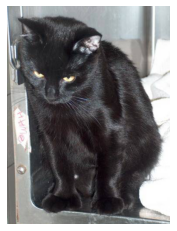

In [ ]:
import random, os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
filename = "train/cats/" +  random.choice(os.listdir("train/cats"))
img = mpimg.imread(filename)
plt.imshow(img)
plt.axis(False);

### Images of dogs

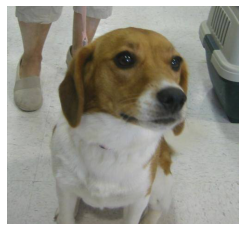

In [ ]:
import random, os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
filename = "train/dogs/" +  random.choice(os.listdir("train/dogs"))
img = mpimg.imread(filename)
plt.imshow(img)
plt.axis(False);

## Preprocessing our data

In [ ]:
import tensorflow as tf
train_dir = "train"
test_dir = "test"

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(224,224),
                                                                 label_mode="binary")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=(224,224),
                                                                label_mode="binary")

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [ ]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
data_augmentation = tf.keras.models.Sequential([
                    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
                    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
], name="data_augmentation")

## Preparing our model

### Create the model architecture

In [ ]:
# Create the model
base_model = tf.keras.applications.EfficientNetV2B3(include_top=False)
base_model.trainable=True
inputs = tf.keras.Input(shape=(224,224,3), name="inputs")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

### Compile the architecture

In [ ]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

### Saving some checkpoints while training

In [ ]:
checkpoint_path = "base_model/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

### Fit the model to our training dataset

In [ ]:
history_1 = model_1.fit(train_data,
                      epochs=100,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=int(0.15*len(test_data)),
                      callbacks=[checkpoint_callback,
                                 tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=3),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                                      factor=0.2, 
                                                                      patience=2,
                                                                      verbose=1,
                                                                      min_lr=1e-7),
                                 create_tensorboard_callback(dir_name="VGG_on_binary_1",
                                                             experiment_name="all_in_one_go")])

Saving TensorBoard log files to: VGG_on_binary_1/all_in_one_go/20220217-144949
Epoch 1/100
625/625 [==============================] - ETA: 0s - loss: 0.0583 - accuracy: 0.9796
Epoch 1: val_loss improved from inf to 0.01780, saving model to base_model/checkpoint.ckpt
625/625 [==============================] - 310s 458ms/step - loss: 0.0583 - accuracy: 0.9796 - val_loss: 0.0178 - val_accuracy: 0.9959 - lr: 1.0000e-04
Epoch 2/100
625/625 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9861
Epoch 2: val_loss improved from 0.01780 to 0.01090, saving model to base_model/checkpoint.ckpt
625/625 [==============================] - 223s 357ms/step - loss: 0.0359 - accuracy: 0.9861 - val_loss: 0.0109 - val_accuracy: 0.9946 - lr: 1.0000e-04
Epoch 3/100
625/625 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9901
Epoch 3: val_loss did not improve from 0.01090
625/625 [==============================] - 202s 322ms/step - loss: 0.0264 - accuracy: 0.9901 

### Evaluating the results of our model

In [ ]:
result_1 = model_1.evaluate(test_data)
result_1

157/157 [==============================] - 11s 66ms/step - loss: 0.0174 - accuracy: 0.9954


[0.017404811456799507, 0.9954000115394592]

### To make sure our model trained well and didn't overfit

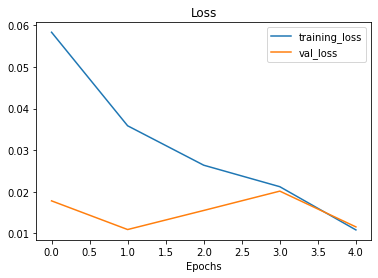

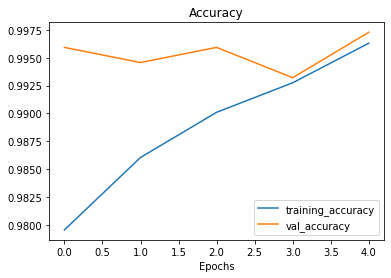

In [ ]:
plot_loss_curves(history_1)

In [ ]:
from helper_functions import *

## Testing our model in real life scenarios

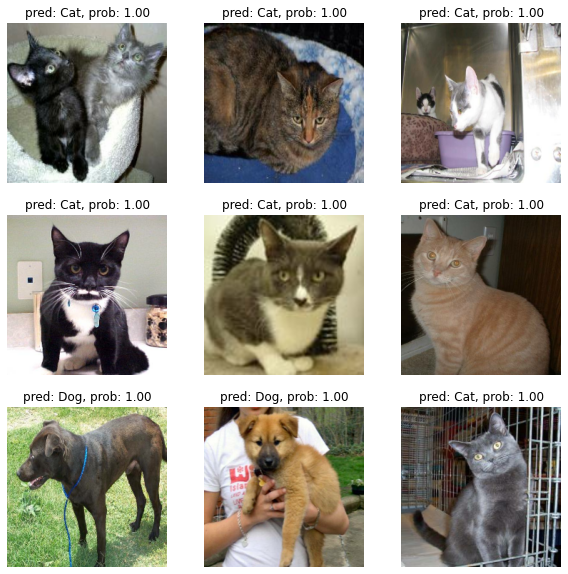

In [ ]:
# See some of the predictions in action
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filename = ["test1/" + filenames for filenames in os.listdir("test1")]
rnd = np.random.randint(len(filename)-9)
plt.figure(figsize=(10,10))
i=0
for img in filename[rnd:rnd+9]:
  image = load_and_prep_image(img, scale=False)
  pred_prob = model_1.predict(tf.expand_dims(image, axis=0))
  if  pred_prob >= 0.5:
    pred_class = "Dog" 
  else:
    pred_class = "Cat"
    pred_prob = 1.0 - pred_prob
  i = i+1
  plt.subplot(3,3,i)
  plt.imshow(image/255.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob[0][0]:.2f}")
  plt.axis(False)

## Saving and loading our model

In [ ]:
model_1.save("cats_and_dogs_prediction_model")

INFO:tensorflow:Assets written to: cats_and_dogs_prediction_model/assets


In [ ]:
# Submission
import pandas as pd
preds = []
for img in filename:
  image = load_and_prep_image(img, scale=False)
  pred_prob = model_1.predict(tf.expand_dims(image, axis=0))
  pred_prob = pred_prob[0][0].round()
  preds.append(pred_prob) 

data = {"id": [id for id in range(len(filename))], "label": preds}
submit = pd.DataFrame(data)
submit

,id,label
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,1.0
...,...,...
12495,12495,1.0
12496,12496,1.0
12497,12497,1.0
12498,12498,0.0


## Tweaking our submission results to fit into the submission standard

In [ ]:
submit["label"] = submit["label"].astype(int)
submit[:10]

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
5,5,0
6,6,1
7,7,1
8,8,1
9,9,0


In [ ]:
submit.to_csv(index=False)

'id,label\n0,0\n1,0\n2,0\n3,0\n4,1\n5,0\n6,1\n7,1\n8,1\n9,0\n10,0\n11,1\n12,0\n13,1\n14,0\n15,0\n16,0\n17,1\n18,0\n19,1\n20,0\n21,0\n22,1\n23,0\n24,0\n25,1\n26,1\n27,1\n28,0\n29,1\n30,1\n31,1\n32,0\n33,0\n34,1\n35,0\n36,0\n37,1\n38,0\n39,0\n40,1\n41,0\n42,0\n43,1\n44,0\n45,1\n46,0\n47,0\n48,0\n49,1\n50,1\n51,0\n52,0\n53,0\n54,0\n55,0\n56,0\n57,0\n58,0\n59,0\n60,0\n61,1\n62,0\n63,1\n64,0\n65,1\n66,0\n67,1\n68,1\n69,0\n70,0\n71,0\n72,0\n73,0\n74,0\n75,0\n76,1\n77,1\n78,0\n79,0\n80,1\n81,1\n82,0\n83,0\n84,0\n85,1\n86,1\n87,1\n88,0\n89,1\n90,1\n91,1\n92,0\n93,0\n94,1\n95,0\n96,0\n97,0\n98,0\n99,1\n100,0\n101,1\n102,0\n103,0\n104,1\n105,1\n106,0\n107,1\n108,0\n109,0\n110,0\n111,0\n112,0\n113,1\n114,0\n115,1\n116,0\n117,0\n118,0\n119,1\n120,0\n121,0\n122,0\n123,0\n124,1\n125,1\n126,1\n127,1\n128,1\n129,0\n130,0\n131,1\n132,0\n133,1\n134,0\n135,0\n136,1\n137,0\n138,1\n139,0\n140,0\n141,0\n142,1\n143,1\n144,1\n145,1\n146,1\n147,1\n148,0\n149,0\n150,1\n151,1\n152,1\n153,0\n154,1\n155,1\n156,0\n

In [ ]:
from pathlib import Path 
filepath = Path('/content/sampleSubmission.csv') 
submit.to_csv(filepath, index=False)

# ----- Thank You -----